In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

file = 'Apprentice_Chef_Dataset.xlsx'

original_df = pd.read_excel(file) # reading excel file

original_df.columns # showing variables


Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
      dtype='object')

In [2]:
original_df = original_df.dropna() #dropping missing values

In [3]:

####
#### print measures for pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1899 non-null float64
CROSS_SELL_SUCCESS              1899 non-null int64
NAME                            1899 non-null object
EMAIL                           1899 non-null object
FIRST_NAME                      1899 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1899 non-null int64
UNIQUE_MEALS_PURCH              1899 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1899 non-null int64
PRODUCT_CATEGORIES_VIEWED       1899 non-null int64
AVG_TIME_PER_SITE_VISIT         1899 non-null float64
MOBILE_NUMBER                   1899 non-null int64
CANCELLATIONS_BEFORE_NOON       1899 non-null int64
CANCELLATIONS_AFTER_NOON        1899 non-null int64
TASTES_AND_PREFERENCES          1899 non-null int64
PC_LOGINS                       1899 non-null int64
MOBILE_LOGINS                   1899 non-null int64
W

In [4]:
#### double checking for missing values
original_df.isnull().sum()

#### we're good

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                     0
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
FOLLOWED_RECOMMENDATIONS_PCT    0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [5]:
#### descriptive stats
original_df.describe().round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00
mean,2109.66,0.68,74.77,4.91,6.98,5.37,99.86,0.88,1.41,0.17,0.72,5.52,1.48,11.35,1.49,2.97,0.36,0.11,35.60,150.67,4.44,0.61,2.79,13.51,106.04
std,1140.78,0.47,55.43,2.50,2.28,3.04,62.91,0.33,1.55,0.43,0.45,0.58,0.53,13.61,2.32,2.74,0.48,0.32,26.58,49.75,1.56,0.64,0.76,2.34,180.79
min,131.00,0.00,11.00,1.00,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.00,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.35,3.00,0.00,2.00,12.00,0.00
50%,1745.00,1.00,60.00,5.00,7.00,5.00,94.12,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.00,8.00,8.00,117.57,1.00,2.00,0.00,1.00,6.00,2.00,14.00,3.00,4.00,1.00,0.00,60.00,173.80,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.00,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


In [6]:
#### checking distribution of data
original_df.loc[:, :].quantile([0.10,
                         0.25,
                         0.50,
                         0.75,
                         1.00])

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0.10,1100.00,0.0,15.8,2.0,4.0,2.0,43.638,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,91.90,3.0,0.0,2.0,11.0,0.0
0.25,1350.00,0.0,39.0,3.0,5.0,3.0,72.000,1.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,1.0,0.0,0.0,10.0,114.35,3.0,0.0,2.0,12.0,0.0
0.50,1745.00,1.0,60.0,5.0,7.0,5.0,94.120,1.0,1.0,0.0,1.0,6.0,1.0,7.0,0.0,2.0,0.0,0.0,30.0,145.60,4.0,1.0,3.0,13.0,0.0
0.75,2670.00,1.0,95.0,7.0,8.0,8.0,117.570,1.0,2.0,0.0,1.0,6.0,2.0,14.0,3.0,4.0,1.0,0.0,60.0,173.80,5.0,1.0,3.0,15.0,174.0
1.00,8793.75,1.0,493.0,19.0,18.0,10.0,1645.600,1.0,13.0,3.0,1.0,7.0,3.0,52.0,9.0,19.0,1.0,1.0,90.0,564.20,11.0,3.0,5.0,19.0,1600.0


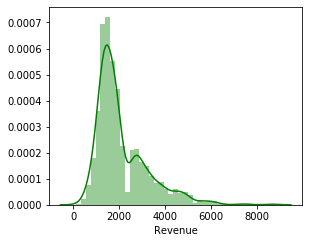

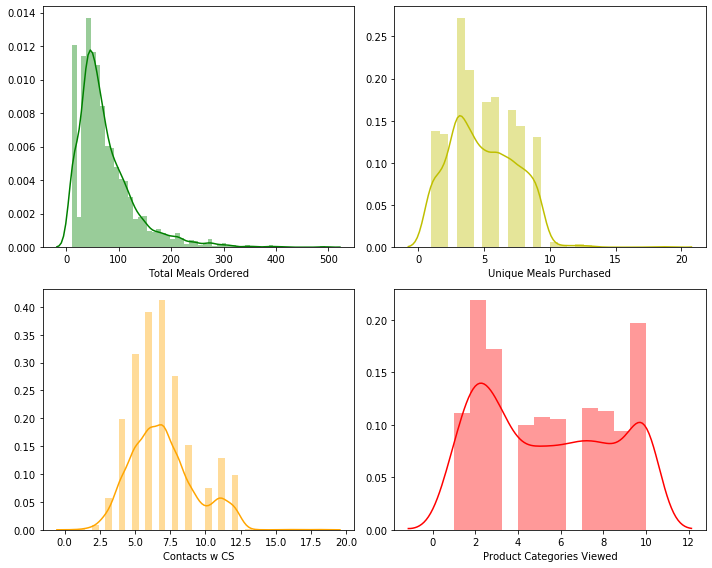

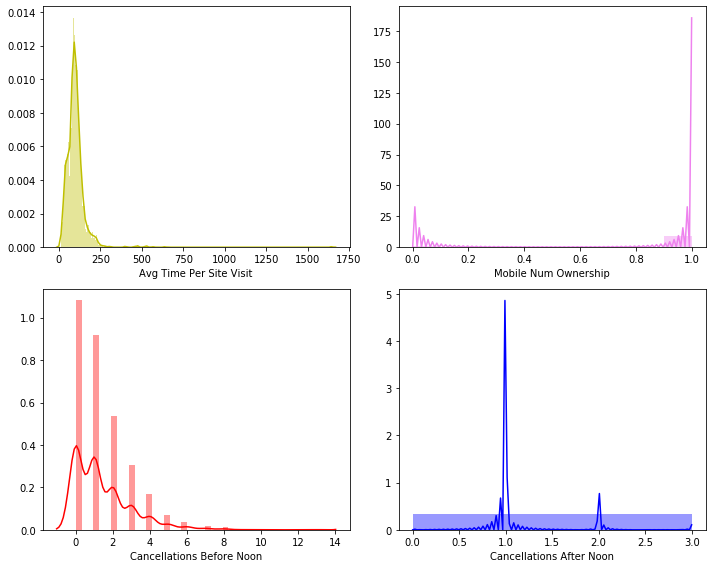

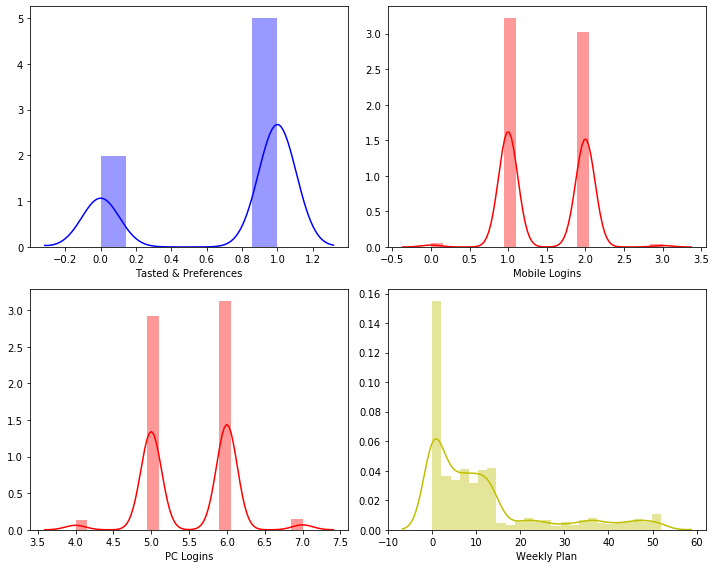

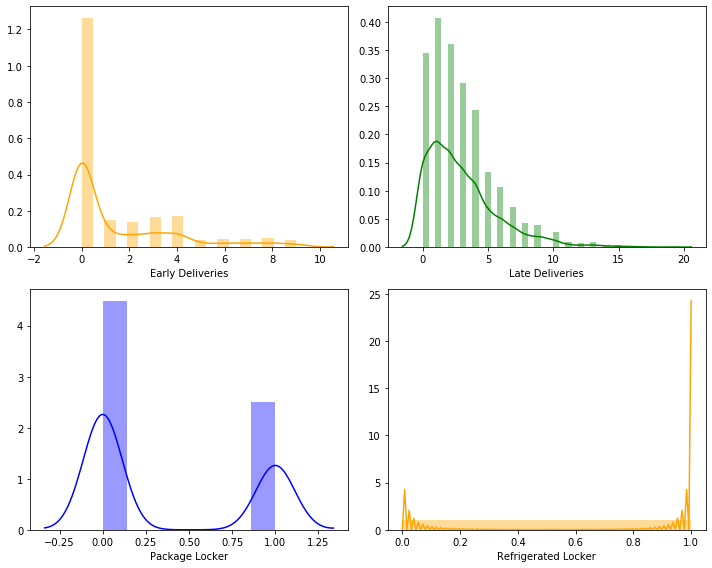

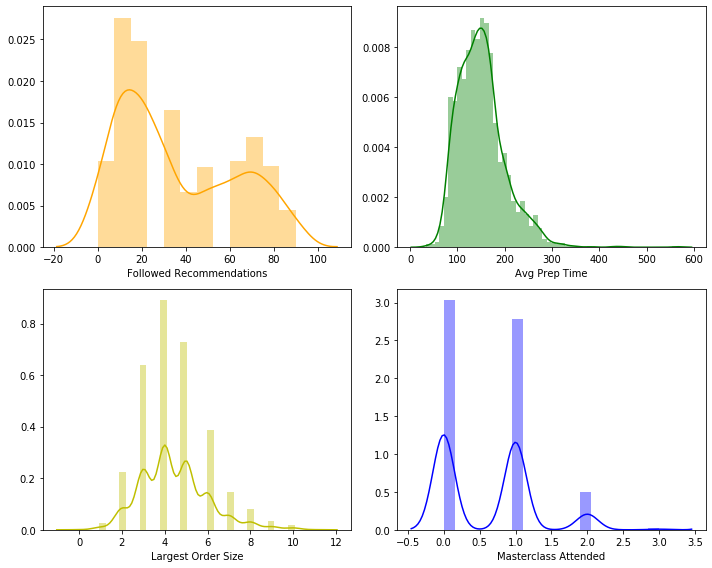

Text(0.5, 0, 'Total Photos Viewed')

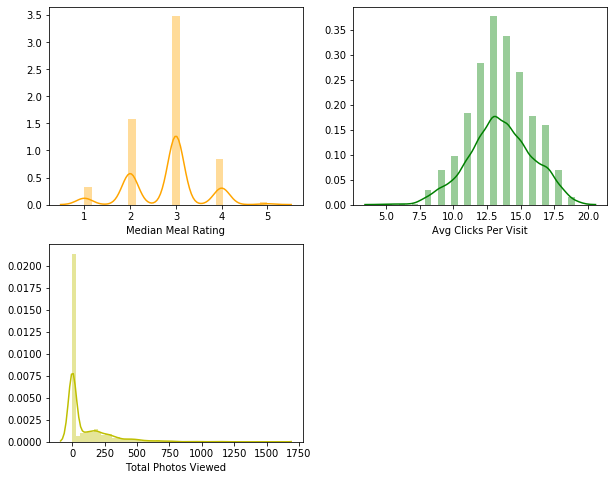

In [7]:


#### plotting stuff and thangs 

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Revenue')

#

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Total Meals Ordered')

#

plt.subplot(2, 2, 2)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Unique Meals Purchased')

#

plt.subplot(2, 2, 3)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Contacts w CS')

#

plt.subplot(2, 2, 4)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('Product Categories Viewed')
plt.tight_layout()
plt.show()

#

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Avg Time Per Site Visit')

#

plt.subplot(2, 2, 2)
sns.distplot(original_df['MOBILE_NUMBER'],
             bins = 10,
             color = 'violet')
plt.xlabel('Mobile Num Ownership')

#

plt.subplot(2, 2, 3)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('Cancellations Before Noon')

#

plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'b')
plt.xlabel('Cancellations After Noon')
plt.tight_layout()
plt.show()

#

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             color = 'b')
plt.xlabel('Tasted & Preferences')

#

plt.subplot(2, 2, 2)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('Mobile Logins')

#

plt.subplot(2, 2, 3)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('PC Logins')

#

plt.subplot(2, 2, 4)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Weekly Plan')
plt.tight_layout()
plt.show()

#

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Early Deliveries')

#

plt.subplot(2, 2, 2)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Late Deliveries')

#

plt.subplot(2, 2, 3)
sns.distplot(original_df['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Package Locker')

#

plt.subplot(2, 2, 4)
sns.distplot(original_df['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Refrigerated Locker')
plt.tight_layout()
plt.show()

#

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Followed Recommendations')

#

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Avg Prep Time')

#

plt.subplot(2, 2, 3)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Largest Order Size')

#

plt.subplot(2, 2, 4)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Masterclass Attended')
plt.tight_layout()
plt.show()

#

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Median Meal Rating')

#

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Avg Clicks Per Visit')

#

plt.subplot(2, 2, 3)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Total Photos Viewed')


These plots guided me through the distribution of the variables, then select which variables has the 

In [8]:
#### setting thresholds for our outliers

REVENUE_HI            = 2250
TOTAL_MEALS_HI        = 300
UNIQUE_MEALS_HI       = 10
CONTACTSw_CustServ_HI = 3
AVG_TIME_HI           = 250
CANCEL_BEFNOON_HI     = 8
MOBILE_LOGINS_LO      = 4.5
MOBILE_LOGINS_HI      = 7
PC_LOGINS_LO          = 1
PC_LOGINS_HI          = 2
WEEKLY_PLAN_HI        = 15
EARLY_DELIVERIES_HI   = 100 
LATE_DELIVERIES_HI    = 10
AVG_PREP_TIME_HI      = 300
LARGEST_ORDER_SIZE_LO = 2
LARGEST_ORDER_SIZE_HI = 8
MASTERCLASS_HI        = 2
AVE_CLICKS_LO         = 8
AVE_CLICKS_HI         = 20
TOTAL_PHOTOS_HI       = 100
MEDIAN_MEAL_RATING_HI = 4

In [9]:

#### Feature Engineering toime (applying outlier thresholds)

# Revenue
original_df['out_REVENUE'] = 0
condition_hi = original_df.loc[0:,'out_REVENUE'][original_df['REVENUE'] > REVENUE_HI]

original_df['out_REVENUE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Total Meals Ordered
original_df['TOTAL_MEALS_HI'] = 0
condition_hi = original_df.loc[0:,'TOTAL_MEALS_HI'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_HI]

original_df['TOTAL_MEALS_HI'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Unique Meals Purchased
original_df['UNIQUE_MEALS_HI'] = 0
condition_hi = original_df.loc[0:,'UNIQUE_MEALS_HI'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_HI]

original_df['UNIQUE_MEALS_HI'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Contacts w/ Customer Service
original_df['CONTACTSw_CustServ_HI'] = 0
condition_hi = original_df.loc[0:,'CONTACTSw_CustServ_HI'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTSw_CustServ_HI]

original_df['CONTACTSw_CustServ_HI'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Ave Time per Site Visit
original_df['AVG_TIME_HI'] = 0
condition_hi = original_df.loc[0:,'AVG_TIME_HI'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_HI]

original_df['AVG_TIME_HI'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Cancellation before noon
original_df['CANCEL_BEFNOON_HI'] = 0
condition_hi = original_df.loc[0:,'CANCEL_BEFNOON_HI']\
                              [original_df['CANCELLATIONS_BEFORE_NOON'] > CANCEL_BEFNOON_HI]

original_df['CANCEL_BEFNOON_HI'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Mobile Log-ins
original_df['out_MOBILE_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_MOBILE_LOGINS']\
                              [original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_HI]
condition_lo = original_df.loc[0:,'out_MOBILE_LOGINS']\
                              [original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_LO]

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# PC Log-ins
original_df['out_PC_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_PC_LOGINS']\
                              [original_df['PC_LOGINS'] > PC_LOGINS_HI]
condition_lo = original_df.loc[0:,'out_PC_LOGINS']\
                              [original_df['PC_LOGINS'] < PC_LOGINS_LO]

original_df['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_PC_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Weekly Plans
original_df['out_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'out_WEEKLY_PLAN']\
                              [original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]

original_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Early deliveries
original_df['out_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_EARLY_DELIVERIES']\
                              [original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Late deliveries
original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES']\
                              [original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Average Prep Video Time
original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_TIME_HI]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Largest Order Size
original_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE']\
                              [original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_HI]
condition_lo = original_df.loc[0:,'out_LARGEST_ORDER_SIZE']\
                              [original_df['PRODUCT_CATEGORIES_VIEWED'] < LARGEST_ORDER_SIZE_LO]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# Masterclasses Attended
original_df['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = original_df.loc[0:,'out_MASTER_CLASSES_ATTENDED']\
                              [original_df['MASTER_CLASSES_ATTENDED'] > MASTERCLASS_HI]

original_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Average Clicks Per Visit
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT']\
                              [original_df['AVG_CLICKS_PER_VISIT'] > AVE_CLICKS_HI]
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT']\
                              [original_df['AVG_CLICKS_PER_VISIT'] < AVE_CLICKS_LO]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Total Photos Viewed
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED']\
                              [original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_HI]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Median Meal Rating
original_df['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = original_df.loc[0:,'out_MEDIAN_MEAL_RATING']\
                              [original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_HI]

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


Text(0.5, 0, 'Categories Viewed')

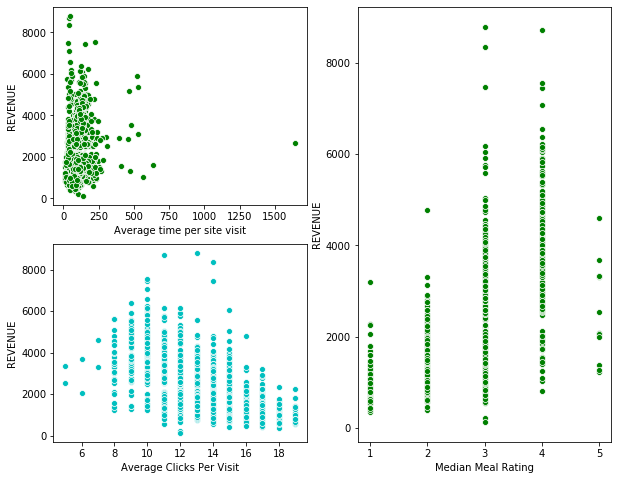

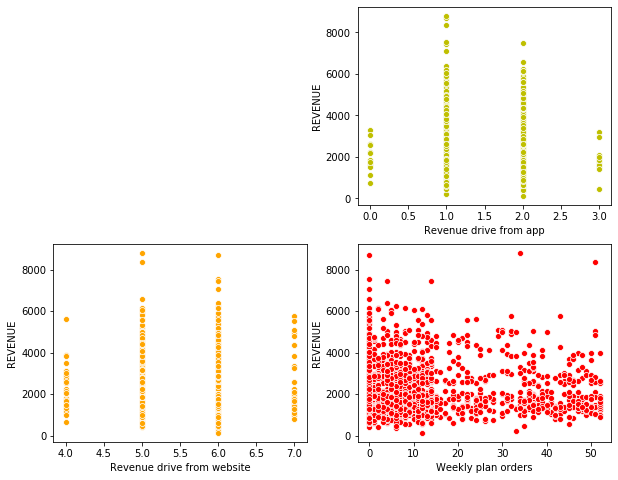

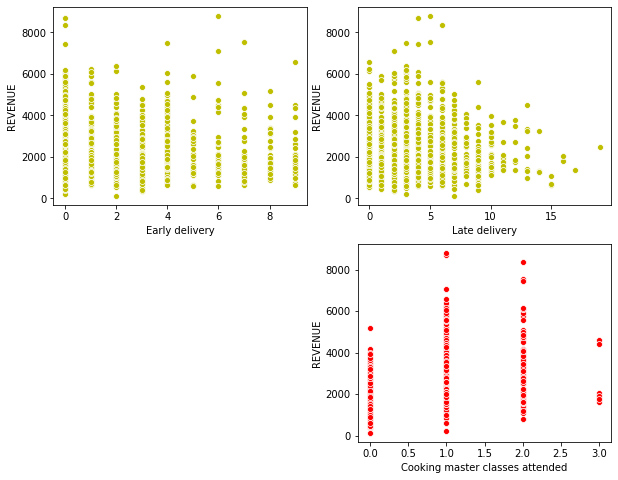

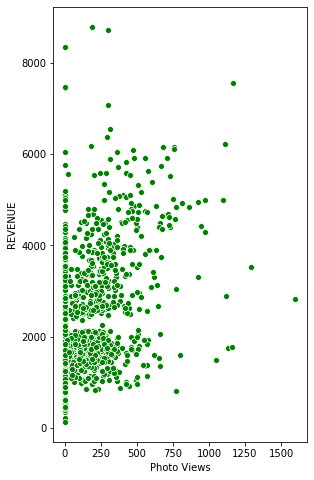

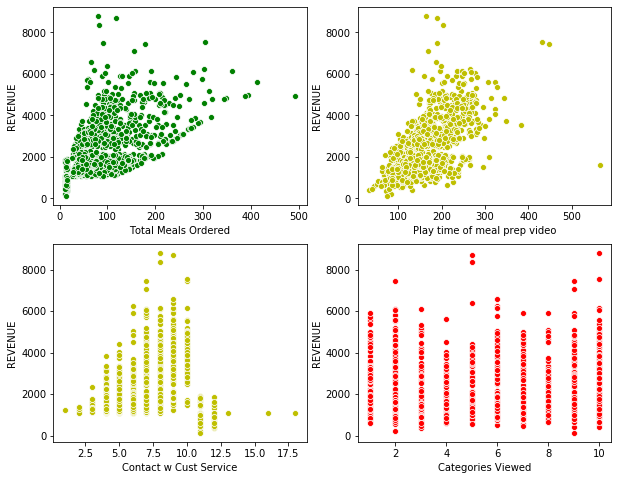

In [10]:
#### Scatter Plot time! 

# Ave Time per Visit x Revenue
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Average time per site visit')

# Ave Prep Vid Runtime x Revenue
plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Average Playing Time of Meal Prep Video')

# Average Clicks per Visit x Largest Order Size
plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['REVENUE'],
                color = 'c')
plt.xlabel('Average Clicks Per Visit')

# Recommendations x Revenue
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('% of Time Customers Followed Meal Recommendations')


# Meal Rating x Revenue
plt.subplot(1, 2, 2)
sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Median Meal Rating')


# Total Photos VIewed x Revenue
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Total Clicks on Photos')

# 
plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['MOBILE_LOGINS'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Revenue drive from app')

#
plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['PC_LOGINS'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Revenue drive from website')

#
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['WEEKLY_PLAN'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Weekly plan orders')

#
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Early delivery')

#
plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['LATE_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Late delivery')

#
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['MASTER_CLASSES_ATTENDED'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Cooking master classes attended')

#
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Photo Views')

#
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Total Meals Ordered')

#
plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Play time of meal prep video')

#
plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Contact w Cust Service')

#
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Categories Viewed')

Scatter plots have been a lot more helpful in understanding the outliers we have. It showed where the outliers really separated from the majority.

In [11]:
##### NEW COLUMNS
original_df['log_REVENUE'] = np.log(original_df['REVENUE'])


#### Setting outlier thresholds one more time
REVENUE_NEW_HI                      = 2250
AVE_MEAL_PREP_TIME_NEW_HI           = 500
CONTACTS_W_CUSTOMER_SERVICE_NEW_HI  = 13
CONTACTS_W_CUSTOMER_SERVICE_NEW_LO  = 3
MEAL_PREP_VID_NEW_HI                = 550
MEAL_PREP_VID_NEW_LO                = 120
PHOTO_VIEWS_NEW_HI                  = 250

In [12]:
#### Feature engineering one more time!

original_df['change_AVG_PREP_VID_TIME'] = 0
condition = original_df.loc[0:,'change_AVG_PREP_VID_TIME']\
            [original_df['AVG_PREP_VID_TIME'] > AVE_MEAL_PREP_TIME_NEW_HI]
original_df['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = original_df.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE']\
            [original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_NEW_HI]
condition_lo = original_df.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE']\
                              [original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_NEW_LO]
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

original_df['change_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'change_AVG_PREP_VID_TIME']\
                              [original_df['AVG_CLICKS_PER_VISIT'] > MEAL_PREP_VID_NEW_HI]
condition_lo = original_df.loc[0:,'change_AVG_PREP_VID_TIME']\
                              [original_df['AVG_CLICKS_PER_VISIT'] < MEAL_PREP_VID_NEW_LO]

original_df['change_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_df.loc[0:,'change_TOTAL_PHOTOS_VIEWED']\
            [original_df['TOTAL_PHOTOS_VIEWED'] > PHOTO_VIEWS_NEW_HI]
original_df['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

In [13]:
# backing up Apprentice Chef dataset
original_df_explanatory = original_df.copy()

# removing Revenue and variables with text for explanatory analysis
original_df_explanatory = original_df.drop(['REVENUE', 'NAME', 'EMAIL',
                                           'FIRST_NAME', 'FAMILY_NAME', 
                                           'log_REVENUE', 'out_REVENUE'], 
                                            axis = 1)

# format the remaining
for val in original_df_explanatory:
    print(f"original_df['{val}'] +")

original_df['CROSS_SELL_SUCCESS'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['PC_LOGINS'] +
original_df['MOBILE_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['TOTAL_MEALS_HI'] +
original_df['UNIQUE_MEALS_HI'] +
original_df['CONTACTSw_CustServ_HI'] +
original_d

In [14]:
lm_full = smf.ols(formula = """REVENUE~ original_df['CROSS_SELL_SUCCESS'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['PC_LOGINS'] +
original_df['MOBILE_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['TOTAL_MEALS_HI'] +
original_df['UNIQUE_MEALS_HI'] +
original_df['CONTACTSw_CustServ_HI'] +
original_df['AVG_TIME_HI'] +
original_df['CANCEL_BEFNOON_HI'] +
original_df['out_MOBILE_LOGINS'] +
original_df['out_PC_LOGINS'] +
original_df['out_WEEKLY_PLAN'] +
original_df['out_EARLY_DELIVERIES'] +
original_df['out_LATE_DELIVERIES'] +
original_df['out_AVG_PREP_VID_TIME'] +
original_df['out_LARGEST_ORDER_SIZE'] +
original_df['out_MASTER_CLASSES_ATTENDED'] +
original_df['out_AVG_CLICKS_PER_VISIT'] +
original_df['out_TOTAL_PHOTOS_VIEWED'] +
original_df['out_MEDIAN_MEAL_RATING'] +
original_df['change_AVG_PREP_VID_TIME'] +
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['change_TOTAL_PHOTOS_VIEWED'] """,
data = original_df)


# fitting them
results_full = lm_full.fit()


# printing the results
results_full.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     89.33
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:42:44   Log-Likelihood:                -15060.
No. Observations:                1899   AIC:                         3.020e+04
Df Residuals:                    1859   BIC:                         3.042e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                           -95.6288    115.947     -0.825      0.410    -323.028     131.770
original_df['CROSS_SELL_SUCCESS']                   -57.1101     39.062     -1.462      0.144    -133.719      19.499
original_df['TOTAL_MEALS_ORDERED']                    5.5302      0.392     14.102      0.000       4.761       6.299
original_df['UNIQUE_MEALS_PURCH']                   -62.1319      6.606     -9.405      0.000     -75.088     -49.175
original_df['CONTACTS_W_CUSTOMER_SERVICE']           48.7988      7.241      6.739      0.000      34.597      63.001
original_df['PRODUCT_CATEGORIES_VIEWED']             11.2932      5.694      1.983      0.047       0.126      22.460
original_df['AVG_TIME_PER_SITE_VISIT']               -0.4879      0.328     -1.488      0.137      -1.131       0.155
original_df['MOBILE_NUMBER']                         47.4034     48.438      0.979      0.328     -47.595     142.402
original_df['CANCELLATIONS_BEFORE_NOON']             -0.9749     10.607     -0.092      0.927     -21.777      19.828
original_df['CANCELLATIONS_AFTER_NOON']             -49.3265     36.514     -1.351      0.177    -120.939      22.286
original_df['TASTES_AND_PREFERENCES']                39.2449     35.045      1.120      0.263     -29.488     107.978
original_df['PC_LOGINS']                              8.2713     27.116      0.305      0.760     -44.910      61.452
original_df['MOBILE_LOGINS']                        -38.0217     29.905     -1.271      0.204     -96.673      20.630
original_df['WEEKLY_PLAN']                           -2.5706      2.403     -1.070      0.285      -7.283       2.141
original_df['EARLY_DELIVERIES']                       2.4410      6.812      0.358      0.720     -10.918      15.800
original_df['LATE_DELIVERIES']                        6.4567      6.612      0.977      0.329      -6.511      19.424
original_df['PACKAGE_LOCKER']                       -23.6845     37.507     -0.631      0.528     -97.244      49.875
original_df['REFRIGERATED_LOCKER']                  -17.1823     56.423     -0.305      0.761    -127.842      93.477
original_df['FOLLOWED_RECOMMENDATIONS_PCT']          -0.4169      0.674     -0.618      0.537      -1.739       0.906
original_df['AVG_PREP_VID_TIME']                      9.7878      0.672     14.557      0.000       8.469      11.107
original_df['LARGEST_ORDER_SIZE']                  -104.9490     17.443     -6.017      0.000    -139.159     -70.739
original_df['MASTER_CLASSES_ATTENDED']              180.5779     29.153      6.194      0.000     123.401     237.754
original_df['MEDIAN_MEAL_RATING']                   363.9293     43.038      8.456      0.000     279.522     448.337
original_df['AV

In [15]:
#### Taking care of the emails
placeholder_lst = []

# Looping on every email address
for index, col in original_df.iterrows():
    
    # spltting email addresses 
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    placeholder_lst.append(split_email)     


email_df = pd.DataFrame(placeholder_lst)

# did it work?
print(email_df)
# yes sir

                                     0                1
0                         addam.osgrey     passport.com
1                      aegon.blackfyre          jnj.com
2            aegon.frey.(son.of.aenys)        gmail.com
3     aegon.targaryen.(son.of.rhaegar)          ibm.com
4                    aegon.v.targaryen  goldmansacs.com
...                                ...              ...
1894                            yandry        yahoo.com
1895                            yorkel        gmail.com
1896                       young.henly        gmail.com
1897                            ysilla   protonmail.com
1898                      ysilla.royce      hotmail.com

[1899 rows x 2 columns]


In [16]:
# labeling new columns
email_df.columns = ['concatenate' , 'email_domain']

# concatenate
original_df = pd.concat([original_df, email_df.loc[: ,'email_domain']],
                   axis = 1) 

In [17]:
# One Hot Encoding
#one_hot_domain_group = pd.get_dummies(original_df['domain_group'])

# dropping categorical variables
#original_df = original_df.drop('domain_group', axis = 1)

# joining codings together
#original_df = original_df.join([one_hot_domain_group])

In [18]:
# preparing explanatory variable data
original_df_data   = original_df.drop(['REVENUE',
                               'out_REVENUE'],
                               axis = 1)


# preparing response variable data
original_df_target = original_df.loc[:, 'REVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size = 0.25,
            random_state = 222)


# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1458, 49)
(1458,)
(486, 49)
(486,)


In [19]:
x_variables = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
               'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
               'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS',
               'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
               'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE',
               'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT',
               'out_tot_meals_ord', 'out_contacts_w_customer_service', 'out_avg_time_per_site_visit',
               'out_cancellations_before_noon', 'out_cancellations_after_noon', 'out_weekly_plan', 
               'out_early_deliveries', 'out_late_deliveries', 
               'TOTAL_PHOTOS_VIEWED', 'out_avg_clicks_per_visit', 'out_largest_order', 'out_avg_prep_vid_time',
               'change_tot_meals_ord', 'change_tot_photos_viewed', 'change_avg_prep_vid_time', 'change_avg_time_per_visit',
               'change_cancellations_after_noon', 'change_cancellations_before_noon', 'change_late_deliveries',
               'change_unique_meals_purch', 'change_cont_w_customer_ser']

for val in x_variables:
    print(f"original_df_train['{val}'] +")

original_df_train['CROSS_SELL_SUCCESS'] +
original_df_train['TOTAL_MEALS_ORDERED'] +
original_df_train['UNIQUE_MEALS_PURCH'] +
original_df_train['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df_train['PRODUCT_CATEGORIES_VIEWED'] +
original_df_train['AVG_TIME_PER_SITE_VISIT'] +
original_df_train['MOBILE_NUMBER'] +
original_df_train['CANCELLATIONS_BEFORE_NOON'] +
original_df_train['CANCELLATIONS_AFTER_NOON'] +
original_df_train['TASTES_AND_PREFERENCES'] +
original_df_train['MOBILE_LOGINS'] +
original_df_train['PC_LOGINS'] +
original_df_train['WEEKLY_PLAN'] +
original_df_train['EARLY_DELIVERIES'] +
original_df_train['LATE_DELIVERIES'] +
original_df_train['PACKAGE_LOCKER'] +
original_df_train['REFRIGERATED_LOCKER'] +
original_df_train['AVG_PREP_VID_TIME'] +
original_df_train['LARGEST_ORDER_SIZE'] +
original_df_train['MASTER_CLASSES_ATTENDED'] +
original_df_train['MEDIAN_MEAL_RATING'] +
original_df_train['AVG_CLICKS_PER_VISIT'] +
original_df_train['out_tot_meals_ord'] +
original_df_train['out_c

In [20]:
original_df_train = pd.concat([X_train, y_train], axis = 1)

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


lm_best = smf.ols(formula =  """log_REVENUE ~ 
original_df_data['TOTAL_MEALS_ORDERED'] +
original_df_data['UNIQUE_MEALS_PURCH'] +
original_df_data['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df_data['AVG_TIME_PER_SITE_VISIT'] +
original_df_data['WEEKLY_PLAN'] +
original_df_data['EARLY_DELIVERIES'] +
original_df_data['REFRIGERATED_LOCKER'] +
original_df_data['AVG_PREP_VID_TIME'] +
original_df_data['LARGEST_ORDER_SIZE'] +
original_df_data['MASTER_CLASSES_ATTENDED'] +
original_df_data['MEDIAN_MEAL_RATING'] +
original_df_data['out_AVG_TIME_PER_SITE_VISIT'] +
original_df_data['out_TOTAL_MEALS_ORDERED'] +
original_df_data['out_UNIQUE_MEALS_PURCH'] +
original_df_data['out_PRODUCT_CATEGORIES_VIEWED'] +
original_df_data['out_WEEKLY_PLAN'] +
original_df_data['out_LARGEST_ORDER_SIZE'] +
original_df_data['out_MASTER_CLASSES_ATTENDED'] +
original_df_data['out_MEDIAN_MEAL_RATING'] +
original_df_data['change_AVG_TIME_PER_SITE_VISIT'] +
original_df_data['change_AVG_PREP_VID_TIME'] +
original_df_data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df_data['change_TOTAL_PHOTOS_VIEWED'] """,
                  data = original_df_data)
                  
#
results = lm_best.fit()
                  
#
print(results.summary())

PatsyError: Error evaluating factor: KeyError: 'change_AVG_TIME_PER_SITE_VISIT'
    log_REVENUE ~  original_df_data['TOTAL_MEALS_ORDERED'] + original_df_data['UNIQUE_MEALS_PURCH'] + original_df_data['CONTACTS_W_CUSTOMER_SERVICE'] + original_df_data['AVG_TIME_PER_SITE_VISIT'] + original_df_data['WEEKLY_PLAN'] + original_df_data['EARLY_DELIVERIES'] + original_df_data['REFRIGERATED_LOCKER'] + original_df_data['AVG_PREP_VID_TIME'] + original_df_data['LARGEST_ORDER_SIZE'] + original_df_data['MASTER_CLASSES_ATTENDED'] + original_df_data['MEDIAN_MEAL_RATING'] + original_df_data['out_AVG_TIME_PER_SITE_VISIT'] + original_df_data['out_TOTAL_MEALS_ORDERED'] + original_df_data['out_UNIQUE_MEALS_PURCH'] + original_df_data['out_PRODUCT_CATEGORIES_VIEWED'] + original_df_data['out_WEEKLY_PLAN'] + original_df_data['out_LARGEST_ORDER_SIZE'] + original_df_data['out_MASTER_CLASSES_ATTENDED'] + original_df_data['out_MEDIAN_MEAL_RATING'] + original_df_data['change_AVG_TIME_PER_SITE_VISIT'] + original_df_data['change_AVG_PREP_VID_TIME'] + original_df_data['change_CONTACTS_W_CUSTOMER_SERVICE'] + original_df_data['change_TOTAL_PHOTOS_VIEWED']
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


# INSTANTIATING
lr = sklearn.linear_model.LinearRegression()

# FITTING
lr_fit = lr.fit(X_train, y_train)

# PREDICTING
lr_pred = lr_fit.predict(X_test)

# SCOOOORE
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))

In [ ]:
#### RIDGE TIME
import sklearn.linear_model # linear models

ridge_model = sklearn.linear_model.Ridge()

# FITTING
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING
ridge_pred = ridge_fit.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(3))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(3))


# SCOOOOORE
ridge_train_score = ridge_model.score(X_train, y_train).round(3)
ridge_test_score  = ridge_model.score(X_test, y_test).round(3)

In [ ]:
#### LASSO TIME

lasso_model = sklearn.linear_model.Lasso()

# FITTING
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING
lasso_pred = lasso_fit.predict(X_test)


# SCOOOOOORE
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)


print('Training Score:', lasso_train_score)
print('Testing Score:',  lasso_test_score)